In [1]:
suppressPackageStartupMessages(library(tidyverse))

ini <- ini::read.ini("../config.ini")

In [2]:
#read in results: 
columns <- c("chr", "start", "end")

#cis
h_cis <- read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_cis-only`, col_names = columns)
m_cis <- read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_cis-only`, col_names = columns)

#trans
h_trans <- read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_trans-only`, col_names = columns)
m_trans <- read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_trans-only`, col_names = columns)

#cis&trans
h_ct <- read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_cis+trans`, col_names = columns)
m_ct <- read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_cis+trans`, col_names = columns)

Rows: 1114 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1040 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 812 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (2): start, end


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1171 Columns: 3

── Column specification ────────────────────────

In [3]:
#merge
cis <- bind_rows(h_cis, m_cis) %>% mutate(category = "cis only")
trans <- bind_rows(h_trans, m_trans) %>% mutate(category = "trans only")
ct <- bind_rows(h_ct, m_ct) %>% mutate(category = "cis & trans")

all <- bind_rows(cis, trans, ct)

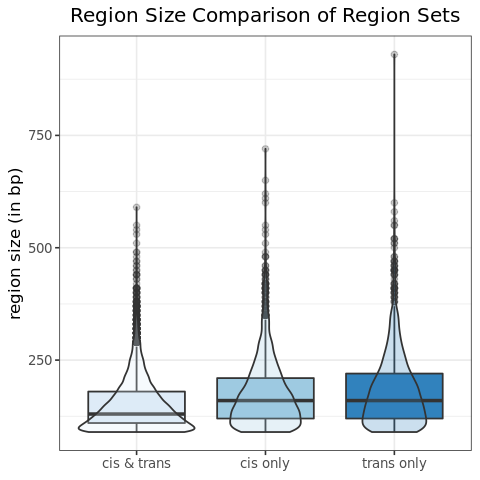

In [4]:
#plot
p <- ggplot(all, aes(x = category, y = abs(end-start), fill = category)) +
    geom_boxplot(outlier.alpha = 0.25) +
    geom_violin(alpha = 0.25) +
    scale_fill_brewer(palette = "Blues") +
    labs(y = "region size (in bp)", title = "Region Size Comparison of Region Sets") +
    theme_bw(base_size = 10) +
    theme(legend.position = "none", axis.title.x = element_blank(), plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 4, repr.plot.height = 4)
p

In [5]:
ggsave(plot = p, filename = paste0(ini$DELTA_ACTIVITY$plots, "/region_size.pdf"), device = cairo_pdf, width = 4, height = 4)